In [1]:
# Importeren van de nodige packages
# Vul zelf aan met extra packages als dit nodig is voor de oefeningen!
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Vraag 1

Wat is het meetniveau van elk van deze variabelen:

1. de functie van een werknemer (uitvoerend, leidinggevend, ...)
2. het salaris van de werknemer
3. de naam van het departement van de werknemer
4. de anciënniteit (= het aantal jaren in dienst) van de werknemer


### Antwoord vraag 1

1. Qualitatief (ordinaal)
2. Quantitatief (ratio)
3. Qualitatief (nominaal)
4. Quantitatief (ratio)

## Vraag 2 

De Vlaamse overheid wil het sociaal welbevinden van haar inwoners onderzoeken. Daarom laat ze een computer willekeurig gsm-nummers kiezen uit een databank met daarin alle bekende gsm-nummers van Vlamingen. Wanneer iemand niet reageert, wordt herhaaldelijk teruggebeld tot er een antwoord komt of tot een maximum aantal pogingen wordt bereikt. 

1. Is dit een random sample? Leg uit.
2. Welk type fout(en) wordt hier gemaakt?
3. Is dit een goede sample? Leg uit.

In [ ]:
1. 
2. 
3. 

### Antwoord Vraag 2

1. De sample van de gsm-nummers is random mits dit willekeurig geselcteerd wordt door een computer, maar onze effectieve data zal niet random zijn mits enkel gewillige burgers of geïrriteerde burgers hun antwoorden zullen geven.
2. Systematic sampling error en accidental non-sampling errors (zoals een gefrustreerde burger die opzettelijk foute antwoorden geeft)
3. Neen, onze sample gaat vooral de data van gewillige burgers voorstellen en dit gaat dus niet representatief zijn van onze population

## Vraag 3 

Het aantal werknemers op de loonlijst bij een voedingsverwerkend bedrijf wordt aan het begin van elke maand geregistreerd.
Deze gegevens staan hieronder.

1. Geef de datatypes van beide kolommen
2. Vorm de kolom 'datum' om naar het type datetime. Ook als dit je niet lukt kan je verder werken.
3. Maak de volgende plot.

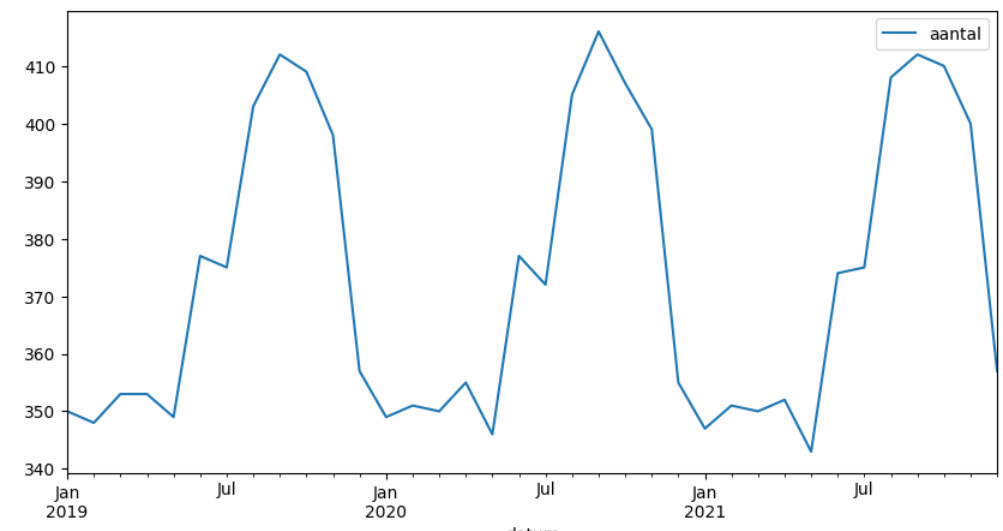

4. Maak een voorspelling voor de eerste vier maanden van het volgende jaar met behulp van de meest geschikte methode. Leg uit waarom je voor deze methode kiest.
5. Maak een plot inclusief de prognose.
6. Maak de volgende berekeningen
- 6.1 Bereken het gemiddeld aantal werknemers in 2020
- 6.2 Hoeveel maanden telde het bedrijf meer dan 400 werknemers?




datum     9
aantal    9
dtype: int64
373.5


[]

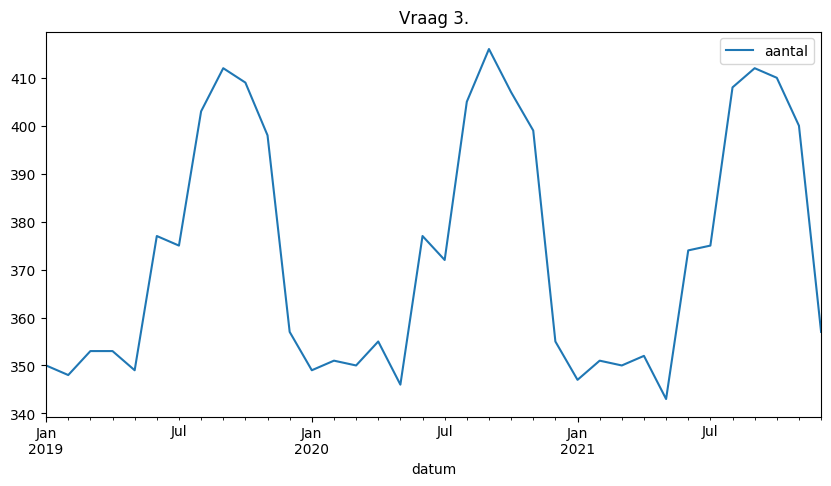

In [29]:
dfwerknemers = pd.DataFrame(data={
    'datum': ['2019/01/01', '2019/02/01', '2019/03/01', '2019/04/01', '2019/05/01', '2019/06/01', '2019/07/01', '2019/08/01', '2019/09/01', '2019/10/01', '2019/11/01', '2019/12/01', '2020/01/01', '2020/02/01', '2020/03/01', '2020/04/01', '2020/05/01', '2020/06/01', '2020/07/01', '2020/08/01', '2020/09/01', '2020/10/01', '2020/11/01', '2020/12/01', '2021/01/01', '2021/02/01', '2021/03/01', '2021/04/01', '2021/05/01', '2021/06/01', '2021/07/01', '2021/08/01', '2021/09/01', '2021/10/01', '2021/11/01', '2021/12/01'],
    'aantal': [350,348,353,353,349,377,375,403,412,409,398,357,349,351,350,355,346,377,372,405,416,407,399,355,347,351,350,352,343,374,375,408,412,410,400,357]
})
dfwerknemers ['datum'] = pd.to_datetime(dfwerknemers['datum'])
dfwerknemers = dfwerknemers.set_index(dfwerknemers['datum'])
dfwerknemersWaarMeerDan400 = dfwerknemers[dfwerknemers.aantal > 400]

dfwerknemersIn2020 = dfwerknemers[(dfwerknemers.datum >= "2020/01/01") & (dfwerknemers.datum < "2021/01/01")]

pv3 =  dfwerknemers.plot( y='aantal', figsize=[10,5])
pv3.set_title("Vraag 3.")
pv3.plot()

In [31]:
print(dfwerknemersWaarMeerDan400.datum.count())
print(dfwerknemersIn2020['aantal'].mean())

9
373.5


Text(0.5, 1.0, 'Vraag 4')

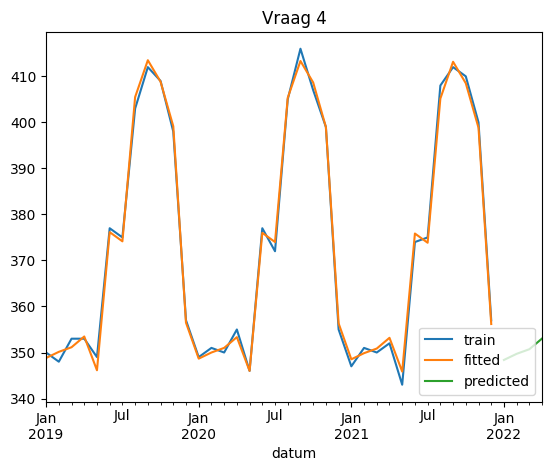

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = dfwerknemers.aantal


model = ExponentialSmoothing(train,
  trend='add', seasonal='multiplicative',
  seasonal_periods=12, freq='MS').fit()

model_predicted= model.forecast(4)

train.plot(legend=True, label='train')
model.fittedvalues.plot(legend=True, label='fitted')


model_predicted.plot(legend=True, label='predicted')

plt.title('Vraag 4')

### Antwoord vraag 3

1. datum (object), aantal (int64)
2. DONE : dfwerknemers ['datum'] = pd.to_datetime(dfwerknemers['datum']) (then we set is as the index)
3. (Genereer de plot hierboven in een codecel. Geef duidelijk aan dat de plot bij deze deelvraag hoort!)
4. Er is een trend en we zien een seasonal component, daarom ga ik triple exponential smoothing gebruiken
5. (Genereer de plot hierboven in een codecel. Geef duidelijk aan dat de plot bij deze deelvraag hoort!)
6. ...
   1. Het gemiddelde aantal werknemer in 2020 was 373.5
   2. Er waren negen maanden waarin er meer dan 400 werknemers zijn

## Vraag 4
Een toenemende zorg van werkgevers is de tijd die werknemers besteden aan 'surfen op het net voor niet professionele doeleinden'. Men schat dat per werknemer 2 uur per dag hieraan verloren gaat. Stel dat de CEO van een groot bedrijf wil bepalen of de gemiddelde hoeveelheid verspilde tijd minder is dan de gerapporteerde 120 minuten. In een willekeurige steekproef worden 10 werknemers gecontacteerd en wordt gevraagd naar de dagelijks verspilde tijd op het werk. (Er wordt waarschijnlijk anonimiteit gegarandeerd om waarheidsgetrouwe antwoorden te krijgen).  
Bewijzen de onderstaande gegevens dat de gemiddelde verspilde tijd voor dit bedrijf minder dan 120 minuten is?  
Voer een test uit met 5% significance level om deze vraag te beantwoorden.

1. Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!
2. Formuleer de nulhypothese en de alternatieve hypothese
3. Bereken de gepaste toetsingsgrootheid (teststatistiek) voor deze toets. Geef het symbool en de waarde
4. Bereken de p-waarde
5. Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.

In [35]:
verspilde_tijd = [108, 112, 117, 130, 111, 131, 113, 113, 105, 128]
# Properties of the sample:
n = 10      # sample size
sm = np.mean(verspilde_tijd)  # sample mean
ss = np.std(verspilde_tijd)  # sample(!) standard deviation
a = 0.05    # significance level (chosen by the researcher)
m0 = 120    # hypothetical population mean (H0)

In [42]:
p = stats.t.cdf(sm, loc=m0, scale=ss/np.sqrt(n), df=n-1) # Let op! cdf() ipv sf()!
print("p-waarde: %.5f" % p)
if(p < a):
    print("p < a, dus H0 verwerpen")
else:
    print("p > a, dus H0 niet verwerpen")

p-waarde: 0.14408
p > a, dus H0 niet verwerpen


In [40]:
# Critical value according to the formula in the lecture slides
# g = m0 - stats.norm.isf(a) * s / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.t.isf(1-a, loc=m0, scale=(ss / np.sqrt(n)), df=n-1)
print("Critical value g ≃ %.3f" % g)
if (sm > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (sm, g))

Critical value g ≃ 114.804
sample mean = 116.800 > g = 114.804: do not reject H0


### Antwoord vraag 4

1. We hebben een kleine sample size (< 30) daarom gaan we een t-test gebruiken en we willen bewijzen of het aantal verspile minuten kleiner is dan geschat, dus gaan we de left-tailed t-test toepassen
2. H0: mu = 120
   H1 = mu < 120
3. Critical value (g) = 114.804 en dus kleiner dan de sample mean 116.800 => Verwerp H0 niet
4. P = 0.14408 (groter dan a)=> H0 niet verwerpen
5. Onze P-waarde is groter dan onze significance level en onze critical value is kleiner dan onze sample mean, dus we kunnen H0 niet verwerpen. Onze werknemers verspillen wel degelijk gemiddeld 120 minuten per dag aan het gebruik van het internet.

## Vraag 5

Er zijn twee verkeerslichten op de route die een bepaald individu volgt om van zijn huis naar het werk te gaan.  
E = de gebeurtenis dat het individu moet stoppen bij het eerste licht  
F = de gebeurtenis dat het individu moet stoppen bij het tweede licht 

$P(E)$ = 0.4  
$P(F)$ = 0.3  
$P(E \cap F)$ = 0.15  

1. Zijn E en F onafhankelijke events? Leg kort uit waarom wel of waarom niet?
2. Wat is de kans dat het individu ten minste aan één van de lichten moet stoppen?
3. Wat is de kans dat het individu aan geen van beide lichten moet stoppen?
4. Wat is de kans dat het individu ten minste aan het eerste licht moet stoppen?
5. Wat is de kans dat het individu aan exact één van de lichten moet stoppen?
6. Wat is de kans dat het individu enkel aan het eerste licht moet stoppen?


### Antwoord vraag 5

1. P(E) * P(F) is niet gelijk aan P(E & F) dus ze zijn niet onafhankelijk van elkaar
2. 0.7
3. 1 - 0.45 = 0.55
4. 0.7 - 0.3 => 0.4
5. 0.55
6. 0.4 * 0.7 (invert P(F))  = 0.28

# Vraag 6
In een studie werden patiënten met een hoge bloeddruk willekeurig toegewezen aan één van twee groepen. In de 'praatgroep' werden vragen gesteld over hun medische geschiedenis en over de strefssfactoren in hun leven in de minuten voorafgaand aan het meten van de bloeddruk. In de 'telgroep' werd gevraagd vier keer hardop te tellen van 1 tot 100 voordat de bloeddruk werd gemeten.  
Is er een verschil in bloeddruk tussen de twee groepen?


1. Maak een plot
2. Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!
3. Formuleer de nulhypothese en de alternatieve hypothese
4. Bereken de p-waarde
5. Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.


In [43]:
praatgroep = [104, 110, 107, 112, 108, 103, 108, 118]
telgroep = [110, 96, 103, 98, 100, 109, 97, 105]

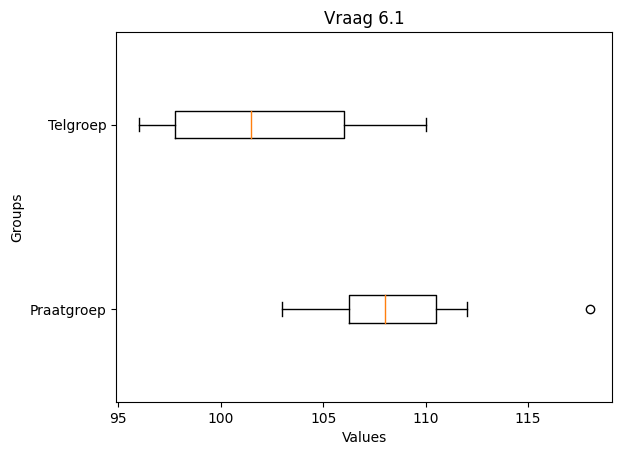

In [51]:
data = [praatgroep, telgroep]
labels = ['Praatgroep', 'Telgroep']

plt.boxplot(data, labels=labels, vert=False) 
plt.title('Vraag 6.1')
plt.xlabel('Values')  
plt.ylabel('Groups') 

plt.show()

In [46]:
stats.ttest_rel(praatgroep, telgroep, alternative='less')
#H0: µ1 - µ2  = 0 (the heart rate of both is the same)
#H1: µ1 - µ2 < 0 (the heart rate of the praatgroep is significantly higher)
#p-waarde > 0.05 => Niet genoeg bewijs om H0 te verwerpen

TtestResult(statistic=2.184069891354803, pvalue=0.9673762552303249, df=7)

### Antwoord vraag 6

1. (Genereer de plot hierboven in een codecel. Geef duidelijk aan dat de plot bij deze deelvraag hoort!)
2. #H0: µ1 - µ2  = 0 (the heart rate of both is the same)
    #H1: µ1 - µ2 < 0 (the heart rate of the praatgroep is significantly higher)
3. #p-waarde > 0.05 => Niet genoeg bewijs om H0 te verwerpen
4. ...
5. ...


## Vraag 7

Stel dat de verdeling van de netto-typsnelheid in
woorden per minuut (wpm) voor ervaren typisten kan worden
benaderd kan worden door een normale curve met gemiddelde 60 wpm en
standaardafwijking 15 wpm
1. Wat is de kans dat de netto-snelheid van een willekeurig gekozen typist
maximaal 60 wpm is?
2. Wat is de kans dat de netto-snelheid van een willekeurig gekozen typist
nettosnelheid tussen 45 en 90 wpm ligt?
3. Zou je verbaasd zijn om een typist te vinden
wiens netto-snelheid hoger is dan 105 wpm?
4. Stel dat een speciale training zal worden gegeven aan de langzaamste 20% van de typisten. Welke typesnelheden zouden in aanmerking komen voor deze opleiding?

0.2004541932604496

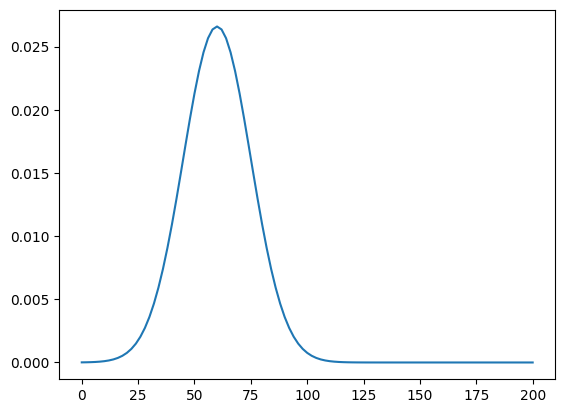

In [68]:
#Plot
# Take 100 values for the X-axis, between -4 and 4, evenly spaced
mu = 60
s = 15
x = np.linspace(0, 200, num=101)
y = stats.norm.pdf(x, mu, s)
# Plot the probability density function (pdf) for these X-values
plt.plot(x, y)
stats.norm.cdf(60, loc=mu, scale=s)
stats.norm.cdf(45, loc=mu, scale=s) - stats.norm.sf(90, loc=mu, scale=s)
stats.norm.sf(105, loc=mu, scale=s)
stats.norm.cdf(47.4, loc=mu, scale=s)

### Antwoord vraag 7

1. 0.5 -> 50%
2. 0.13590512198327787 -> ~ 14%
3. 0.001349898031630093 Ja want er is slecht 0.1% kans dat een typist zo snel kan typen
4. 47.4

## Vraag 8

Een maatstaf voor het succes van een knieoperatie is het bewegingsbereik van het kniegewricht na de operatie. Het postoperatieve bewegingsbereik werd geregistreerd voor 12 patiënten na een knieoperatie. De leeftijd van elke patiënt werd ook geregistreerd. De gegevens zijn hieronder gegeven.

1. Visualiseer de data met een geschikte plot
2. Geef de vergelijking van de regressierechte 
3. Geef het geschatte bewegingsbereik van iemand van 38 jaar oud.
4. Bereken de correlatiecoëfficient (symbool + waarde)
5. Geef de interpretatie voor de waarde van de correlatiecoëfficient
6. Stel dat we het bewegingsbereik uitdrukken als een hoek in radialen in plaats van een hoek in graden, zal de waarde van de correlatiecoëfficient dan veranderen? Illustreer je antwoord met de opgegeven data.  
hoek in radialen = hoek in graden / 180 * $π$


Regression line: ŷ = 107.58 + 0.87 x
140.6802110817942


C:\Users\liamr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<bound method NDFrame.head of     leeftijd  bewegingsbereik  bewegingsbereik_gradialen
0         35              154                   2.687807
1         24              142                   2.478368
2         40              137                   2.391101
3         31              133                   2.321288
4         28              122                   2.129302
5         25              126                   2.199115
6         26              135                   2.356194
7         16              135                   2.356194
8         14              108                   1.884956
9         20              120                   2.094395
10        21              127                   2.216568
11        30              122                   2.129302>

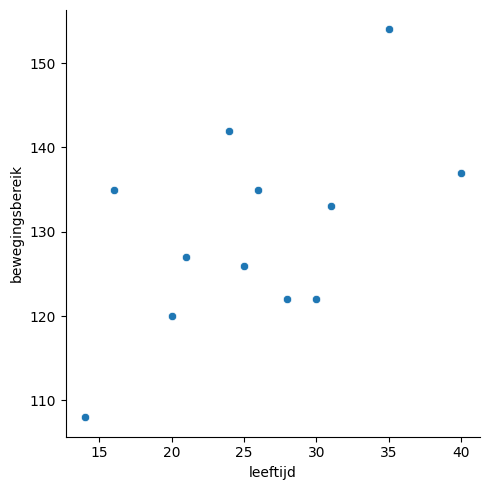

In [85]:
from sklearn.linear_model import LinearRegression
dfknie = pd.DataFrame(data={'leeftijd': [35, 24, 40, 31, 28, 25, 26, 16, 14, 20, 21, 30], 
                            'bewegingsbereik': [154, 142, 137, 133, 122, 126, 135, 135, 108, 120, 127, 122]})
sns.relplot(data=dfknie,  x='leeftijd', y='bewegingsbereik')
dfknie['bewegingsbereik_gradialen'] = (dfknie.bewegingsbereik / 180) * np.pi
x = dfknie.leeftijd.values.reshape(-1,1)
y = dfknie.bewegingsbereik
model = LinearRegression().fit(x, y)
print(f"Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")

#Predict value of 2035 (two sets of square brackets are always needed (it expects an array as argument), it also returns an array that's why we need the third set to access the first element)
bewegingsbereik_38jaar = model.predict([[38]])[0]
print(bewegingsbereik_38jaar)
dfknie.head


In [83]:
#Correlation coefficient
cor = np.corrcoef(dfknie.leeftijd, dfknie.bewegingsbereik_gradialen)[0][1]
print(f"R = {cor}")

R = 0.5533560801115996


### Antwoord vraag 8

1. (Genereer de plot hierboven in een codecel. Geef duidelijk aan dat de plot bij deze deelvraag hoort!)
2. ŷ = 107.58 + 0.87 x
3. 140.6802110817942
4. R = 0.5533560801115998
5. There is a strong correlation between the age and freedom of movement
6. R zal licht veranderen naar 0.5533560801115996, wat nog steeds de sterke associatie aanwijst

## Vraag 9

We weten op basis van historische data dat de vluchttijden (in minuten) voor een specifieke vlucht normaal verdeeld zijn.  
De gemeten vluchttijden tussen 1 januari en 31 maart zijn hieronder gegeven. 


1. Bereken en geef een 90% betrouwbaarheidsinterval voor
de gemiddelde vluchttijd voor deze vlucht.


In [87]:
vluchttijden = np.array([57, 54, 55, 51, 56, 48, 52, 51, 59, 59, 57, 54, 55, 51, 56, 48, 52, 51, 59, 59, 57, 54, 55, 51, 56, 48, 52, 51, 59, 59, 57, 54, 55, 51, 56, 48, 52, 51, 59, 59])

In [91]:
# Step 1.
m = np.mean(vluchttijden)      # Sample mean
s = np.std(vluchttijden)      # Population standard deviation
n = vluchttijden.size     # Sample size
alpha = .1  # 1 - alpha is the confidence level

# Step 2.
z = stats.norm.isf(alpha/2)
print("z-score: %.5f" % z)

# Step 3.
lo = m - z * s / np.sqrt(n)
hi = m + z * s / np.sqrt(n)
print("Confidence interval: [%.4f, %.4f]" % (lo, hi))

z-score: 1.64485
Confidence interval: [53.2931, 55.1069]


### Antwoord vraag 9

Confidence interval: [53.2931, 55.1069]

## Vraag 10
Een volkswijsheid luidt dat er meer kinderen geboren worden gedurende bepaalde fasen van de maancyclus, in het bijzonder bij volle maan. In 2005 werd een classificatie gedaan van het aantal geboortes alnaargelang de maancyclus. 
Een steekproef van het aantal geboortes gedurende verschillende maancycli wordt hieronder gegeven.  
Is er een verband tussen de maancyclus en het aantal geboortes?

1. Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!
2. Formuleer de nulhypothese en de alternatieve hypothese
3. Bereken de gepaste toetsingsgrootheid (teststatistiek) voor deze toets. Geef het symbool en de waarde
4. Bereken de p-waarde
5. Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.


C:\Users\liamr\AppData\Local\Temp\ipykernel_16520\1179685882.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dfmaan, hue='maanfase', x='aantal_geboorten');


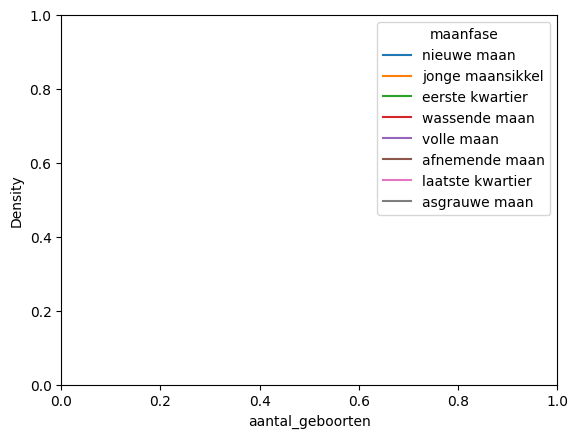

In [98]:
dfmaan = pd.DataFrame(data={'maanfase': ['nieuwe maan', 'jonge maansikkel', 'eerste kwartier', 'wassende maan', 'volle maan', 'afnemende maan', 'laatste kwartier', 'asgrauwe maan'], 
                            'aantal_dagen': [24, 152, 24, 149, 24, 150, 24, 152],
                            'aantal_geboorten': [7680, 48442, 7579, 47814, 7711, 47595, 7733, 48230]})
dfmaan['meanDayPerMoonPhase'] = dfmaan['aantal_geboorten'] / dfmaan['aantal_dagen']
dfmaan.head(10)


### Antwoord vraag 10

1. 
- $H_0$: $\mu_1 - \mu_2 = 0$ (the average amount of births is the same regardless of moon phase)
- $H_1$: $\mu_1 - \mu_2 < 0$ (reaction time is significantly higher in the treatment group compared to the control group)
1. ...
2. ...
3. ...
4. ...

## Vraag 11

Een doos bevat vijf stukjes papier, gemarkeerd met €1, €1, €1, €10 en €25.  
Een speler kiest twee stukjes papier en wint dan het grootste van de bedragen op de twee stukjes papier.  
Definieer een discrete random variabele _X_ met _X_ = gewonnen bedrag.  
1. Bepaal de discrete probabiliteitsdistributie van dit spel
- $P(X = 1) = ?$
- $P(X = 10) = ?$
- $P(X = 25) = ?$
2. Vervang in *Prob_X* hieronder [0.1, 0.3, 0.5] door de gevonden waarden voor een grafische weergave van de discrete probabiliteitsdistributie.  
3. Bereken de verwachtingswaarde (expectation) van de random variabele _X_.  


(Hint: beschouw de stukjes papier als genummerd 1, 2, 3, 4 en 5.)


0.3
0.15000000000000002


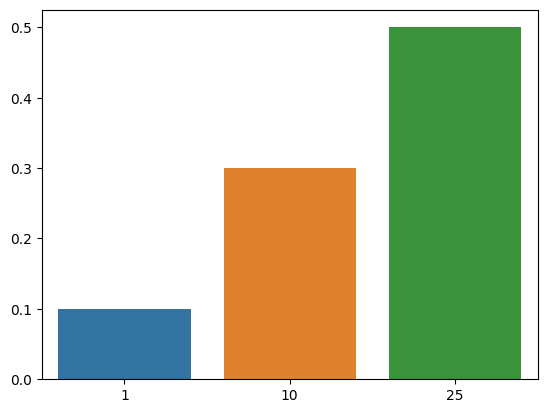

In [94]:
X = [1, 10, 25]             # Mogelijke uitkomsten. Ongewijzigd laten!!
Prob_X = [0.1, 0.3, 0.5]    # Vervang door de zelf gevonden waarden!!
sns.barplot(x = X, y = Prob_X)  # Visuele voorstelling. Ongewijzigd laten!!

print((3/5) * (2/4))
print(1/5 * (3/4))
print(1/5 * (3/4))

### Antwoord vraag 11

1. 0.3 -> 30%
2. 0.15 -> 15%
3. 0.2 -> 20%